# Camera Calibration

In [23]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# number of rows and columns in the chessboard
crows = 9
ccols = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ccols*crows,3), np.float32)
print (objp.shape)

mesh = np.mgrid[0:crows, 0:ccols]
meshT = mesh.T
# assign x-y co-ordinates
objp[:,:2] = meshT.reshape(-1,2)

(54, 3)


In [24]:
import matplotlib.image as mpimg

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
image_save_dir = 'output_images'
# Step through the list and search for chessboard cor(objp)ners
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (crows,ccols), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (crows,ccols), corners, ret)
        write_name = '/'.join([image_save_dir, 'corners_found'+str(idx)+'.jpg'])
        
        mpimg.imsave(write_name, img)

In [25]:
# Calibrate camera
import random 

idx = random.randint(0, len(images) - 1)
img = mpimg.imread(images[idx])
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

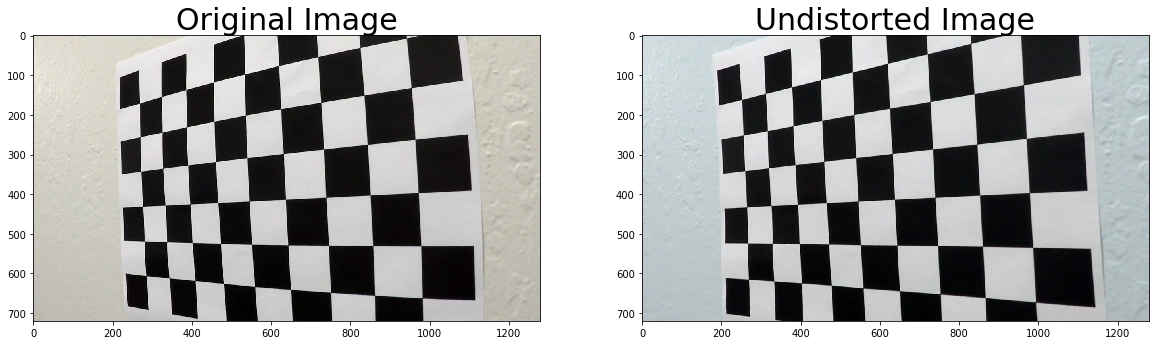

In [26]:
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    write_name = '/'.join([image_save_dir, 'undistored'+str(idx)+'.jpg'])
    mpimg.imsave(write_name,dst)

# sample visualization of an undistored image
idx = random.randint(0, len(images) - 1)
fname = '/'.join([image_save_dir, 'undistored'+str(idx)+'.jpg'])
test = mpimg.imread(fname)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

# Perspective Transform

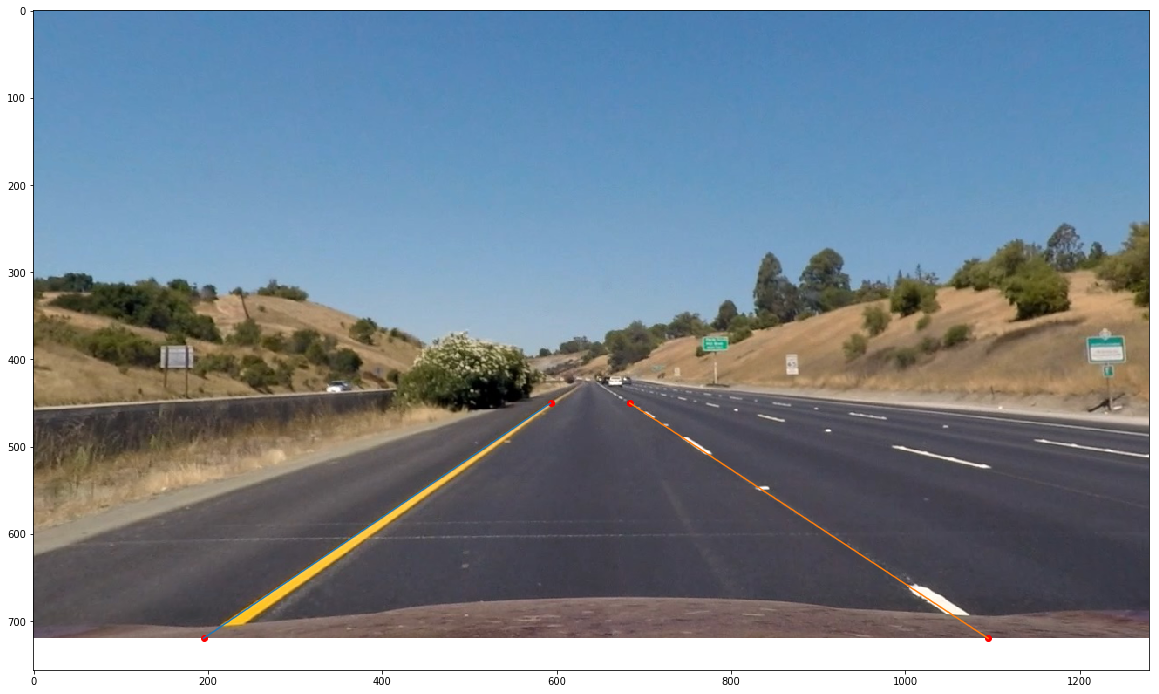

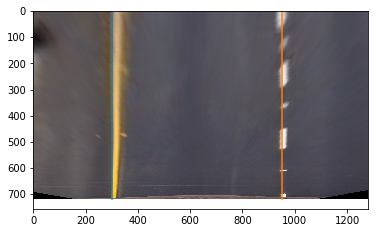

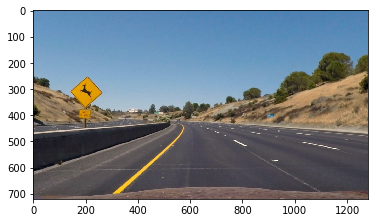

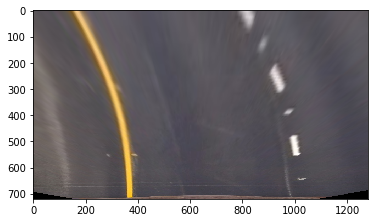

In [27]:
straight_image = mpimg.imread('test_images/straight_lines1.jpg')
straight_image = cv2.undistort(straight_image, mtx, dist, None, mtx)
plt.figure(figsize=(20,20))
plt.imshow(straight_image)

plt.plot(593, 450, 'ro')
plt.plot(684, 450, 'ro')
plt.plot(1095, 720, 'ro')
plt.plot(195, 720, 'ro')

plt.plot((195, 593), (720, 450))
plt.plot((1095, 684), (720, 450))

src = np.float32([[593, 450], [684, 450], [1095, 720], [195, 720]])
dst = np.float32([[300, 0], [950, 0], [950, 720], [300, 720]])

M = cv2.getPerspectiveTransform(src, dst)
MInv = cv2.getPerspectiveTransform(dst, src)
# Warp the image using OpenCV warpPerspective()
img_size = (straight_image.shape[1], straight_image.shape[0])
warped = cv2.warpPerspective(straight_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.figure()
plt.imshow(warped)
plt.plot((300, 300), (0,720))
plt.plot((950, 950), (0,720))

mpimg.imsave('output_images/perspective_after_1.jpg', warped)

curved_image = mpimg.imread('test_images/test2.jpg')
curved_image = cv2.undistort(curved_image, mtx, dist, None, mtx)
plt.figure()
plt.imshow(curved_image)
warped = cv2.warpPerspective(curved_image, M, img_size, flags=cv2.INTER_LINEAR)
plt.figure()
plt.imshow(warped)
mpimg.imsave('output_images/perspective_after_2.jpg', warped)

In [28]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x = 0
    y = 0
    if orient == 'x':
        x = 1
    else:
        y=1
    sob = cv2.Sobel(gray, cv2.CV_64F, x,y)
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sob)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255.0 * (abs_sobel/np.max(abs_sobel)))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    binary_output = np.zeros(scaled_sobel.shape)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1 
    # 6) Return this mask as your binary_output image

    return binary_output

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F,1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F,0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobel_mag = np.sqrt((sobel_x ** 2) + (sobel_y ** 2))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sobel_scaled = np.uint8(255.0 * (sobel_mag/np.max(sobel_mag)))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros(sobel_scaled.shape)
    binary_output[(sobel_scaled > mag_thresh[0]) & (sobel_scaled < mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    
    return binary_output

# Define a function that thresholds the S-channel of HLS
def color_threshold(img, s_thresh=(0, 255), v_thresh=(0,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel > v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
    binary_output = np.zeros_like(s_channel)
    binary_output[(v_binary == 1) & (s_binary == 1)] = 1
    return binary_output


# Lane Detection

In [29]:
class Tracker:
    
    def __init__(self, win_width = 25, win_height = 80, win_margin = 100, smoothing_factor=15, 
                 ym_px=30/720, xm_px=3.7/700,
                debug=False):
        
        # all the previous left/right window centers
        self.recent_centroids = []
        
        # count the pixels within the window to calculate curve values
        self.win_width = win_width
        
        # vertical slice of image
        self.win_height = win_height
        self.win_margin = win_margin
        self.smoothing_factor = smoothing_factor
        self.xm_px = xm_px
        self.ym_px = ym_px
        
        self.debug = debug
        
        self.prev_left_fit = None
        self.prev_right_fit = None
        
        if self.debug:
            print ("Debugging is ON")
        
    def find_window_centroids(self, img):
        width = self.win_width
        height = self.win_height
        margin = self.win_margin
        
        img_h = img.shape[0]
        img_w = img.shape[1]
        
        window_centroids = [] # Store the (left,right) window centroid positions per level
        window = np.ones(width) # Create our window template that we will use for convolutions
    
        # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
        # and then np.convolve the vertical image slice with the window template 
    
        # Sum quarter bottom of image to get slice, could use a different ratio
        img_mid_idx = int(img_w/2)
        img_three_fourth_idx = int(3 * img_h / 4) # bottom 1/4th rows
        
        offset = width/2
        
        #y_pred = img_h - height/2.0 # center of the window wrt to prev polynomial
        
        left_idx_start = 0
        left_idx_end = img_mid_idx
        #if self.prev_left_fit != None:
        #    x_pred = \
        #    self.prev_left_fit[0] * (y_pred **2) + \
        #    self.prev_left_fit[1] * y_pred + \
        #    self.prev_left_fit[2]
        #    left_idx_start = max(0, int(x_pred - 2*margin))
        #    left_idx_end = min(int(x_pred + 2*margin), img_mid_idx)
            
        #if left_idx_end <= left_idx_start:
        #    Tracer()()
        #    print ("Stop here")
        
        right_idx_start = img_mid_idx
        right_idx_end = img_w
        #if self.prev_right_fit != None:
        #    x_pred = \
        #    self.prev_right_fit[0] * (y_pred **2) + \
        #    self.prev_right_fit[1] * y_pred + \
        #    self.prev_right_fit[2]
        #    right_idx_start = max(int(x_pred - 2*margin), img_mid_idx)
        #    right_idx_end = min(int(x_pred + 2*margin), img_w)
            
        #if right_idx_end <= right_idx_start:
        #    Tracer()()
        #    print ("Stop here")
        
        
        # left quarter
        l_sum = np.sum(img[img_three_fourth_idx:,left_idx_start:left_idx_end], axis=0)
        # right quarter
        r_sum = np.sum(img[img_three_fourth_idx:,right_idx_start:right_idx_end], axis=0)
        
        # find centroids by convolution - convolution output size will be N+M-1
        # Use window_width/2 as offset because convolution signal reference is at right side of window, 
        # not center of window
        l_center = np.argmax(np.convolve(window,l_sum)) - offset
        r_center = np.argmax(np.convolve(window,r_sum)) - offset + right_idx_start
    
        # Add what we found for the first layer
        window_centroids.append((l_center,r_center))
    
        # Go through each vertical layer looking for max pixel locations
        for level in range(1,(int)(img_h/height)):
            if self.debug:
                print ("\nLevel {}:".format(level))
                
            # convolve the window into the vertical slice of the image
            image_layer = np.sum(img[int(img_h -(level+1)*height):int(img_h - level*height),:], axis=0)
            conv_signal = np.convolve(window, image_layer)

            # Find the best left centroid by using past left center as a reference
            # Use offset because convolution signal reference is at right side of window, 
            # not center of window
            l_min_index = int(max(l_center + offset - margin, 0))
            l_max_index = int(min(l_center + offset + margin, img_w))
            if l_max_index <= l_min_index:
                Tracer()()
            conv_left_max_idx = l_min_index + np.argmax(conv_signal[l_min_index:l_max_index])
            l_center =  conv_left_max_idx - offset
            
            # y value wrt to the previous frame polynomial
            if (conv_signal[conv_left_max_idx] < 18000): # TODO - tune this (20000)
                l_center = window_centroids[-1][0]
                print ("Threshold not met in left: {}".format(conv_signal[conv_left_max_idx]))

            # Find the best right centroid by using past right center as a reference
            r_min_index = int(max(r_center + offset - margin, 0))
            r_max_index = int(min(r_center + offset + margin, img_w))
            if r_max_index <= r_min_index:
                Tracer()()
            conv_right_max_idx = r_min_index + np.argmax(conv_signal[r_min_index:r_max_index])
            r_center =  conv_right_max_idx - offset
            if (conv_signal[conv_right_max_idx] < 18000): # TODO - tune this   
                r_center = window_centroids[-1][1]
                print ("Threshold not met in right: {}".format(conv_signal[conv_right_max_idx]))
            
            if self.debug:
                print ("Left Center: {}".format(l_center))
                print ("Left Max: {}".format(conv_signal[conv_left_max_idx]))
                print ("Right Center: {}".format(r_center))
                print ("Right Max: {}".format(conv_signal[conv_right_max_idx]))
                
            # Add what we found for that layer
            window_centroids.append((l_center,r_center))
        
        self.recent_centroids.append(window_centroids)
            
        return np.average(self.recent_centroids[-self.smoothing_factor:], axis=0)
    
    def plot_window_centroids(self, img, window_centroids, save_idx):
        if len(window_centroids) == 0:
            print ("No window centroids available to plot")
            return
        
        # Points used to draw all the left and right centroid windows
        l_points = np.zeros_like(img)
        r_points = np.zeros_like(img)
        
        # Go through each level and draw the windows
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            lx = window_centroids[level][0]
            rx = window_centroids[level][1]
            l_mask = window_mask(window_width,window_height,img,lx,level)
            r_mask = window_mask(window_width,window_height,img,rx,level)
            # Add graphic points from window mask here to total pixels found 
            l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
            r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

        # Draw the results
        template = np.array(r_points + l_points, np.uint8) # add both left and right window pixels together
        zero_channel = np.zeros_like(template) # create a zero color channel
        template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
        # making the original road pixels 3 color channels
        warpage = np.array(cv2.merge((img, img, img)),np.uint8) 
        output = cv2.addWeighted(warpage, 0.8, template, 1, 0.0) # overlay the original road image with window results
        
        write_name = '/'.join([image_save_dir, 'centroid'+str(save_idx)+'.jpg'])
        mpimg.imsave(write_name, output)
        #plt.figure()
        #plt.imshow(output)
        #plt.title('Window fitting results')
        #plt.show()
        
    def fit_window_centroids(self, window_centroids, res_yvals):
        leftx = []
        rightx = []
        # Go through each level and draw the windows
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            lx = window_centroids[level][0]
            rx = window_centroids[level][1]
            leftx.append(lx)
            rightx.append(rx)

        left_fit = np.polyfit(res_yvals, leftx, 2)
        right_fit = np.polyfit(res_yvals, rightx, 2)
        
        left_fit_real = np.polyfit(np.array(res_yvals, np.float32) * self.ym_px, 
                                   np.array(leftx, np.float32) * self.xm_px, 2)
        right_fit_real = np.polyfit(np.array(res_yvals, np.float32) * self.ym_px, 
                                    np.array(rightx, np.float32) * self.xm_px, 2)
        
        return (left_fit, right_fit, left_fit_real, right_fit_real)
        
    def polyfill_road(self, img, left_fit, right_fit, yvals):
        
        left_x = left_fit[0] *yvals*yvals + left_fit[1]*yvals + left_fit[2]
        left_x = np.array(left_x, np.int32)
        right_x = right_fit[0] *yvals*yvals + right_fit[1]*yvals + right_fit[2]
        right_x = np.array(right_x, np.int32)

        left_x_pts = np.concatenate((left_x - (window_width/2), left_x[::-1] + (window_width/2)), axis=0)
        right_x_pts = np.concatenate((right_x - (window_width/2), right_x[::-1] + (window_width/2)), axis=0)
        inner_x_pts = np.concatenate((left_x + (window_width/2), right_x[::-1] - (window_width/2)), axis=0)
        y_pts = np.concatenate((yvals, yvals[::-1]), axis=0)

        left_lane = np.array(list(zip(left_x_pts, y_pts)), np.int32)
        right_lane = np.array(list(zip(right_x_pts, y_pts)), np.int32)
        inner_lane = np.array(list(zip(inner_x_pts, y_pts)), np.int32)

        road = np.zeros_like(img)
        road_bkg = np.zeros_like(img)
        cv2.fillPoly(road, [left_lane], color=[255,0,0])
        cv2.fillPoly(road, [right_lane], color=[255,0,0])
        cv2.fillPoly(road, [inner_lane], color=[0,255,0])

        cv2.fillPoly(road_bkg, [left_lane], color=[255,255,255])
        cv2.fillPoly(road_bkg, [right_lane], color=[255,255,255])

        road_warped = cv2.warpPerspective(road, MInv, img_size, flags=cv2.INTER_LINEAR)
        road_warped_bkg = cv2.warpPerspective(road_bkg, MInv, img_size, flags=cv2.INTER_LINEAR)

        base = cv2.addWeighted(img, 1, road_warped_bkg, -1.0, 0.0)
        result = cv2.addWeighted(base, 1.0, road_warped, 1.0, 0.0)
        
        result = self.annotate_position(result, left_x[-1], right_x[-1])
        
        return result
        
    def annotate_position(self, img, lane_left, lane_right):
        # camera center
        camera_center = (lane_left + lane_right)/2
        center_diff = (camera_center - img.shape[1]/2) * xm_px

        pos = 'left'
        if center_diff > 0:
            pos = 'right'
            
        cv2.putText(img, "Vehicle Position: {:.2f} m {} of center.".format(abs(center_diff), pos), org=(50,75), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255))
        
        return img
    
    def annotate_curvature(self, img, left_fit, right_fit):
        curve_y = img.shape[0]
        
        first_derv_left = (2 * left_fit[0] * curve_y * ym_px) + left_fit[1]
        second_derv_left = abs(2 * left_fit[0])
        
        first_derv_right = (2 * right_fit[0] * curve_y * ym_px) + right_fit[1]
        second_derv_right = abs(2 * right_fit[0])

        left_curv =  ((1 + first_derv_left  ** 2) ** (3/2)) / second_derv_left
        right_curv = ((1 + first_derv_right ** 2) ** (3/2)) / second_derv_right

        cv2.putText(img, "Radius of curvature: {:.2f} m.".format((right_curv+left_curv)/2), org=(50,50), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255))
        
        return img
        
        
    def process_image(self, warped, img, save_idx):
        window_centroids = self.find_window_centroids(warped)
        
        if self.debug:
            self.plot_window_centroids(warped, window_centroids, save_idx)
            
        yvals = np.arange(0, img.shape[0])
        # window centers
        res_yvals = np.arange(img.shape[0] - (window_height/2.0), 0, -window_height)
        
        (left_fit, right_fit, left_fit_real, right_fit_real) = \
        self.fit_window_centroids(window_centroids, res_yvals)
        
        self.prev_left_fit = left_fit
        self.prev_right_fit = right_fit
        
        result = self.polyfill_road(img, left_fit, right_fit, yvals)
        result = self.annotate_curvature(result, left_fit_real, right_fit_real)
        if self.debug:
            plt.figure()
            plt.imshow(result)
        
        return result


In [30]:
def window_mask(width, height, img_ref, center, level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

In [31]:
import matplotlib

window_width=40
window_height=80
window_margin=100
smoothing_factor=9
xm_px = 3.7/700
ym_px = 30/720

class ImageProcessor:
    def __init__(self):
        self.tracker = Tracker(window_width, window_height, window_margin, smoothing_factor, 
                               ym_px, xm_px, debug=False)
        self.save_idx = 0
        

    def process(self, img, do_save=False):
        self.save_idx = self.save_idx + 1
        
        # Tracer()()
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        if do_save:
            write_name = '/'.join([image_save_dir, 'undistorted_road'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, dst)

        # Apply each of the thresholding functions
        gradx = abs_sobel_thresh(dst, orient='x', sobel_kernel=3, thresh=(30, 255))
        grady = abs_sobel_thresh(dst, orient='y', sobel_kernel=3, thresh=(30, 255))
        mag_binary = mag_thresh(dst, sobel_kernel=9, mag_thresh=(50, 255))
        dir_binary = dir_threshold(dst, sobel_kernel=15, thresh=(0.7, 1.3))

        color_binary = color_threshold(dst, s_thresh=(100, 255), v_thresh=(100,255))

        combined_grad = np.zeros_like(dir_binary)
        combined_grad[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

        # Combine the two binary thresholds
        combined_binary = np.zeros_like(combined_grad)
        combined_binary[(combined_grad == 1) | (color_binary == 1)] = 255

        if do_save:
            write_name = '/'.join([image_save_dir, 'threshold'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, combined_binary, cmap=matplotlib.cm.gray)

            warped = cv2.warpPerspective(combined_binary, M, img_size, flags=cv2.INTER_LINEAR)
            write_name = '/'.join([image_save_dir, 'warped'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, warped, cmap=matplotlib.cm.gray)

        do_plotting = 0#random.randint(0,1)

        if do_plotting:
            # Stack each channel to view their individual contributions in green and blue respectively
            # This returns a stack of the two binary images, whose components you can see as different colors
            color_binary = np.dstack(( np.zeros_like(combined_grad), combined_grad, color_binary))

            # Plotting thresholded images
            plt.figure()
            f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(20,10))
            ax1.set_title('Undistored Image')
            ax1.imshow(dst)
            ax2.set_title('Stacked thresholds')
            ax2.imshow(color_binary)

            ax3.set_title('Combined S channel and gradient thresholds')
            ax3.imshow(combined_binary, cmap='gray')

            ax4.set_title('Warped Image')
            ax4.imshow(warped, cmap='gray')

        result = self.tracker.process_image(warped, img, self.save_idx)

        if do_save:
            write_name = '/'.join([image_save_dir, "/road/", 'road'+str(self.save_idx)+'.jpg'])
            mpimg.imsave(write_name, result)

        return result

In [32]:
# run the pipeline for each test image
test_images = glob.glob('test_images/*.jpg')

for idx, fname in enumerate(test_images):
    img = mpimg.imread(fname)
    proc = ImageProcessor()
    proc.process(img, do_save=True)

Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 4095.6884765625
Threshold not met in right: 14387.3291015625
Threshold not met in right: 11162.4755859375
Threshold not met in right: 0.0
Threshold not met in right: 0.0
Threshold not met in right: 9224.0771484375
Threshold not met in right: 0.0
Threshold not met in right: 13320.263671875
Threshold not met in right: 13596.6796875


In [33]:
from moviepy.editor import VideoFileClip

video_file = 'project_video.mp4'
output_video = 'annotated_project_video.mp4'
clip = VideoFileClip(video_file)
#clip = clip.subclip(30,50)
proc = ImageProcessor()
new_clip = clip.fl_image(proc.process)
new_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video annotated_project_video.mp4
[MoviePy] Writing video annotated_project_video.mp4


 42%|████▏     | 525/1261 [11:20<14:33,  1.19s/it]

Threshold not met in right: 2054.1943359375


 42%|████▏     | 526/1261 [11:22<14:47,  1.21s/it]

Threshold not met in right: 4129.306640625


 42%|████▏     | 527/1261 [11:23<14:54,  1.22s/it]

Threshold not met in right: 7076.0009765625


 42%|████▏     | 530/1261 [11:27<15:34,  1.28s/it]

Threshold not met in right: 909.1845703125


 42%|████▏     | 533/1261 [11:31<15:14,  1.26s/it]

Threshold not met in right: 2058.427734375


 45%|████▍     | 564/1261 [12:18<20:42,  1.78s/it]

Threshold not met in left: 0.0
Threshold not met in left: 0.0


 45%|████▍     | 567/1261 [12:23<19:34,  1.69s/it]

Threshold not met in right: 7859.4287109375


 80%|████████  | 1015/1261 [22:12<05:11,  1.26s/it]

Threshold not met in left: 11987.2412109375


100%|█████████▉| 1260/1261 [27:39<00:01,  1.35s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: annotated_project_video.mp4 



In [34]:
from moviepy.editor import VideoFileClip

video_file = 'project_video.mp4'
clip = VideoFileClip(video_file)

for i in range(1,61):
    tm = 25 + (i/10.0)
    clip.save_frame("test_images/frame{}.jpg".format(i), t=tm) # saves the first at t=29

In [35]:
from IPython.core.debugger import Tracer; 

proc = ImageProcessor()
for idx in range(1, 61):
    fname = "test_images/frame{}.jpg".format(idx)
    print (fname)
    img = mpimg.imread(fname)
    
    proc.process(img, do_save=True)

test_images/frame1.jpg
test_images/frame2.jpg
test_images/frame3.jpg
test_images/frame4.jpg
test_images/frame5.jpg
test_images/frame6.jpg
test_images/frame7.jpg
test_images/frame8.jpg
test_images/frame9.jpg
test_images/frame10.jpg
test_images/frame11.jpg
test_images/frame12.jpg
test_images/frame13.jpg
test_images/frame14.jpg
test_images/frame15.jpg
test_images/frame16.jpg
test_images/frame17.jpg
test_images/frame18.jpg
test_images/frame19.jpg
test_images/frame20.jpg
test_images/frame21.jpg
test_images/frame22.jpg
test_images/frame23.jpg
test_images/frame24.jpg
test_images/frame25.jpg
test_images/frame26.jpg
test_images/frame27.jpg
test_images/frame28.jpg
test_images/frame29.jpg
test_images/frame30.jpg
test_images/frame31.jpg
test_images/frame32.jpg
test_images/frame33.jpg
test_images/frame34.jpg
Threshold not met in right: 13320.263671875
test_images/frame35.jpg
test_images/frame36.jpg
test_images/frame37.jpg
test_images/frame38.jpg
test_images/frame39.jpg
test_images/frame40.jpg
test_

In [36]:
import numpy as np
a = [1, 2, 80, 14, 20]
w = [1,1]
c = np.convolve(a,w)
idx = np.argmax(c) - int(len(w)/2)
print (c)

c_rev = c[::-1]
print (np.concatenate((c,c_rev), axis=0)) 
print (c[-1])

[ 1  3 82 94 34 20]
[ 1  3 82 94 34 20 20 34 94 82  3  1]
20


In [37]:
foo = [[(391.5, 949.5), (391.5, 950.5), (395.5, 953.5), (393.5, 984.5), (404.5, 990.5), (407.5, 1013.5), (419.5, 1032.5), (419.5, 1032.5), (460.5, 1094.5)]]

print (foo[0][-3:])
print (np.average(foo[0][-3:], axis=0))

[(419.5, 1032.5), (419.5, 1032.5), (460.5, 1094.5)]
[  433.16666667  1053.16666667]


In [38]:
foo = [1,2,3,4,5,4,3,2,1]

print (np.argmax(foo[4:6]) + 4)

4


In [39]:
bar = np.arange(0, 720)
        # window centers
new_bar = np.arange(720 - 40, 0, -80)
print (new_bar)

[680 600 520 440 360 280 200 120  40]
